In [14]:
# In a Colab cell
!git clone https://github.com/VanshikaKumawat/BlockChain-data-analysis.git
%cd BlockChain-data-analysis



Cloning into 'BlockChain-data-analysis'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 66 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 931.04 KiB | 3.46 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/BlockChain-data-analysis/BlockChain-data-analysis


In [15]:
# 📦 Imports
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 📁 Paths
RAW_PATH = '../data/raw/'
PROCESSED_PATH = '../data/processed/'

# 📄 Load Dataset
file_name = 'transaction_dataset.csv'  # replace if different
df = pd.read_csv(os.path.join(RAW_PATH, file_name))

# 🔍 Preview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [16]:
# 🧾 Basic Info
df.info()

# ❓ Missing Values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [17]:
# 🧾 Fraud Label Summary
label_col = 'FLAG'  # Change if needed
label_counts = df[label_col].value_counts()
total = label_counts.sum()

fraud_count = label_counts[1]
normal_count = label_counts[0]

fraud_pct = round((fraud_count / total) * 100, 2)
normal_pct = round((normal_count / total) * 100, 2)

print("🧾 Fraud Label Summary:")
print(f"Normal wallets (FLAG = 0): {normal_count}")
print(f"Fraud wallets  (FLAG = 1): {fraud_count}")

print("\n📊 Class Ratio:")
print(f"Fraud class  = ~{fraud_pct}%")
print(f"Normal class = ~{normal_pct}%")


🧾 Fraud Label Summary:
Normal wallets (FLAG = 0): 7662
Fraud wallets  (FLAG = 1): 2179

📊 Class Ratio:
Fraud class  = ~22.14%
Normal class = ~77.86%


In [18]:
# 📉 Drop duplicates
df.drop_duplicates(inplace=True)

# 🚿 Handle missing values
df = df.dropna()  # You can replace with fillna(method='ffill') if preferred

# 💾 Save cleaned data
os.makedirs(PROCESSED_PATH, exist_ok=True)
df.to_csv(os.path.join(PROCESSED_PATH, 'cleaned_dataset.csv'), index=False)

print("✅ Cleaned data saved to /data/processed/cleaned_dataset.csv")


✅ Cleaned data saved to /data/processed/cleaned_dataset.csv


<ipython-input-19-fadf0f9b9b4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label_col, palette='Set2')


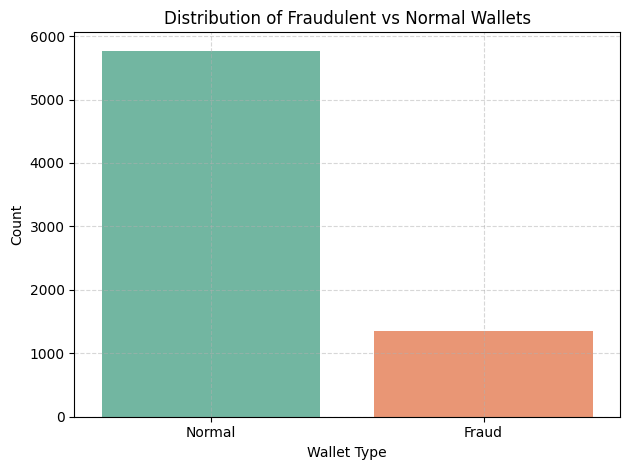

In [19]:
# 📊 Optional: Plot label distribution
sns.countplot(data=df, x=label_col, palette='Set2')
plt.title("Distribution of Fraudulent vs Normal Wallets")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel("Wallet Type")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
